# ※ 필요한 패키지 및 데이터 불러오기

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('daegu.csv', encoding = 'cp949')

In [4]:
df_pre = pd.read_csv('daegu_pre.csv')

<hr>

# 1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
- made by 임낙현

In [38]:
# 필요한 온도 정보만 가져온다.
temp=df_pre.loc[:,['year','month','day','hour','temp','region']]
temp.head()

,year,month,day,hour,temp,region
0,2010,6,1,0,16.500000,동인동
1,2010,6,1,1,18.100000,동인동
2,2010,6,1,2,19.700001,동인동
3,2010,6,1,3,20.799999,동인동
4,2010,6,1,4,22.200001,동인동


In [39]:
# 온도를 소수점 두번째 자리에서 반올림 한 값으로 대체함
temp['temp']=round(temp['temp'],2)
temp.head()

,year,month,day,hour,temp,region
0,2010,6,1,0,16.5,동인동
1,2010,6,1,1,18.1,동인동
2,2010,6,1,2,19.7,동인동
3,2010,6,1,3,20.8,동인동
4,2010,6,1,4,22.2,동인동


In [27]:
# -1 및 -50 과 같은 결측치의 갯수를 세어 봄
temp.loc[(temp['temp']==-1)|(temp['temp']==-50),:].count()

year      53233
month     53233
day       53233
hour      53233
temp      53233
region    53233
dtype: int64

In [211]:
# 0의 갯수를 세어 봄
temp.loc[(temp['temp']==-0),:].count()

year      69673
month     69673
day       69673
hour      69673
temp      69673
region    69673
dtype: int64

In [5]:
# 동인동_2010=df_pre.loc[(df_pre['region']=='동인동') & (df_pre['year']==2010),:]
# weather=동인동_2010.loc[(동인동_2010['month']>=6)&(동인동_2010['month']<=8),['year','month','day','hour','temp','region']]
# 동인동_2010_여름온도_6월_1일=동인동_2010_여름온도.loc[(동인동_2010_여름온도['month']==6)&(동인동_2010_여름온도['day']==1),:]
# 동인동_2010_여름온도_6월_1일.loc[(동인동_2010_여름온도_6월_1일['hour']==0),'temp']

In [41]:
# 결측치인 -1 및 -50을 np.nan으로 바꿈
temp_mv_f=temp.replace(-1,np.nan)
temp_mv=temp_mv_f.replace(-50,np.nan)

temp_mv.loc[(temp_mv['temp']==-1)|(temp_mv['temp']==-50),:].count() # -1과 -50이 없어졌는지 확인해 봄

year      0
month     0
day       0
hour      0
temp      0
region    0
dtype: int64

In [42]:
# 결측치를 forward방향으로 linear하게 대체해 줌
temp_pre=temp_mv.interpolate(method='linear',limit_direction='forward')

In [37]:
# 결측치가 대체되어서 모든 column에서 false로 나오는지 확인해 봄
temp_pre.isna().any()

year      False
month     False
day       False
hour      False
temp      False
region    False
dtype: bool

In [43]:
# 몇년도 부터 몇년도 까지의 데이터가 있는지 확인
temp_pre['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [54]:
regions=temp_pre['region'].unique()
print(regions)

### X년도의 겨울, (X+1)년도의 여름 평균기온의 그래프를 그리는 함수

In [182]:
mo=temp_pre['month']
ye=temp_pre['year']

In [221]:
def winter(y):
    wt1=temp_pre.loc[(mo==12)&(ye==y),:]
    wt2=temp_pre.loc[(mo==1)&(ye==y+1),:]
    wt3=temp_pre.loc[(mo==2)&(ye==y+1),:]

    winter1=[]
    for i in range(1,32):
        a=wt1.loc[(wt1['day']==i),:]
        b=a['temp'].mean()
        winter1.append(round(b,2))

    winter2=[]
    for i in range(1,32):
        a=wt2.loc[(wt2['day']==i),:]
        b=a['temp'].mean()
        winter2.append(round(b,2))

    winter3=[]
    for i in range(1,29):
        a=wt3.loc[(wt3['day']==i),:]
        b=a['temp'].mean()
        winter3.append(round(b,2))

    return winter1+winter2+winter3

In [222]:
def summer(y):
    sm1=temp_pre.loc[(mo==6)&(ye==y),:]
    sm2=temp_pre.loc[(mo==7)&(ye==y),:]
    sm3=temp_pre.loc[(mo==8)&(ye==y),:]

    summer1=[]
    for i in range(3,31):
        a=sm1.loc[(sm1['day']==i),:]
        b=a['temp'].mean()
        summer1.append(round(b,2))

    summer2=[]
    for i in range(1,32):
        a=sm2.loc[(sm2['day']==i),:]
        b=a['temp'].mean()
        summer2.append(round(b,2))

    summer3=[]
    for i in range(1,32):
        a=sm3.loc[(sm3['day']==i),:]
        b=a['temp'].mean()
        summer3.append(round(b,2))

    return summer1+summer2+summer3

In [223]:
def win_sum_graph(y1,y2):
    xs=list(range(1,91))
    ys_winter=winter(y1)
    ys_summer=summer(y2)


    plt.figure(figsize=(55,8)) #그래프 크기 지정

    plt.plot(xs,ys_winter,'o-',ms=3,lw=1,label=str(y1)+'winter')
    plt.plot(xs,ys_summer,'o-',ms=3,lw=1,label=str(y2)+'summer')
    plt.xlabel('Date') #그래프 x축 이름(label) 지정 
    plt.ylabel('Temp')
    plt.ylim(-15,35)
    plt.legend()

    for i in range(len(xs)):
        height=ys_summer[i]
        plt.text(xs[i],height+0.25,'%.1f'%height,ha='center',va='bottom',size=12)
    for i in range(len(xs)):
        height=ys_winter[i]
        plt.text(xs[i],height+0.25,'%.1f'%height,ha='center',va='bottom',size=12)


    # plt.savefig()

### 2010년 겨울의 기온, 2011년 여름의 기온 비교

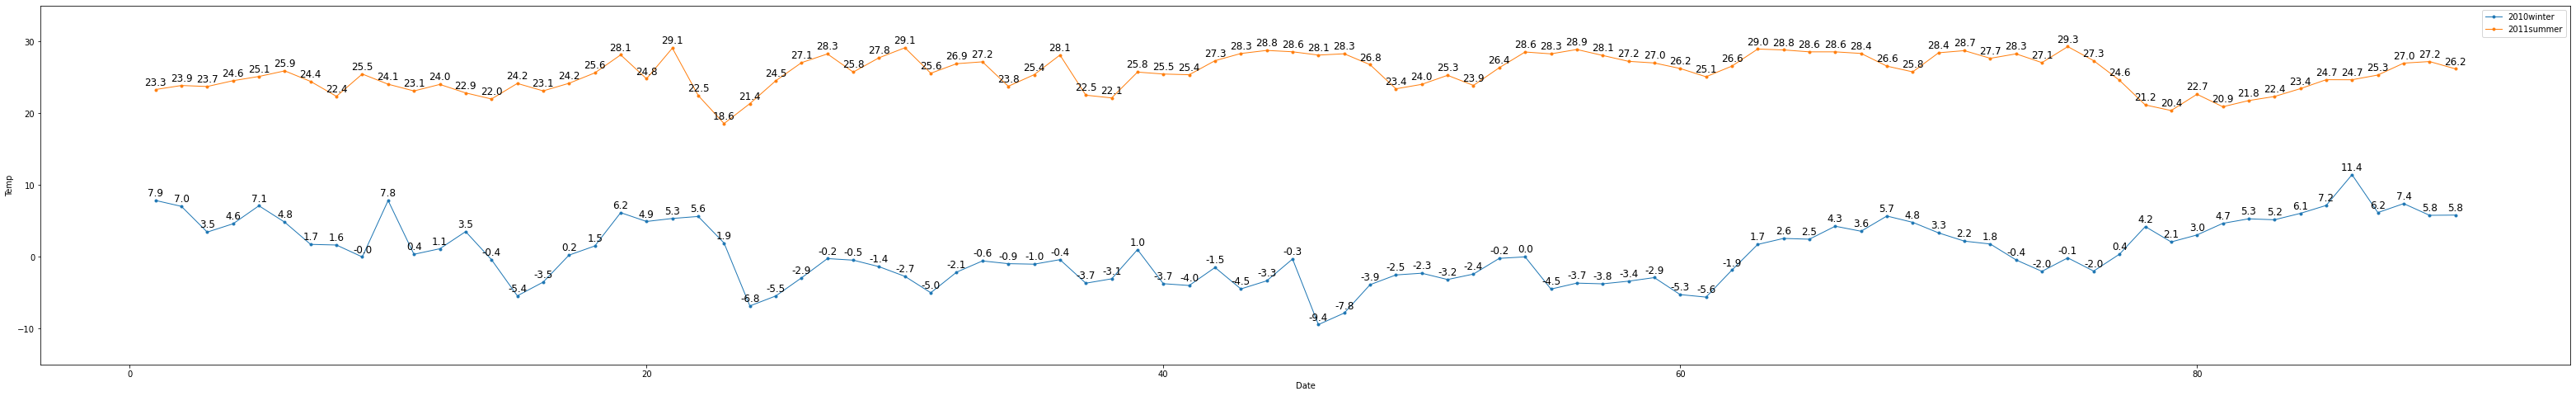

In [219]:
win_sum_graph(2010,2011)

### 2011년 겨울의 기온, 2012년 여름의 기온 비교

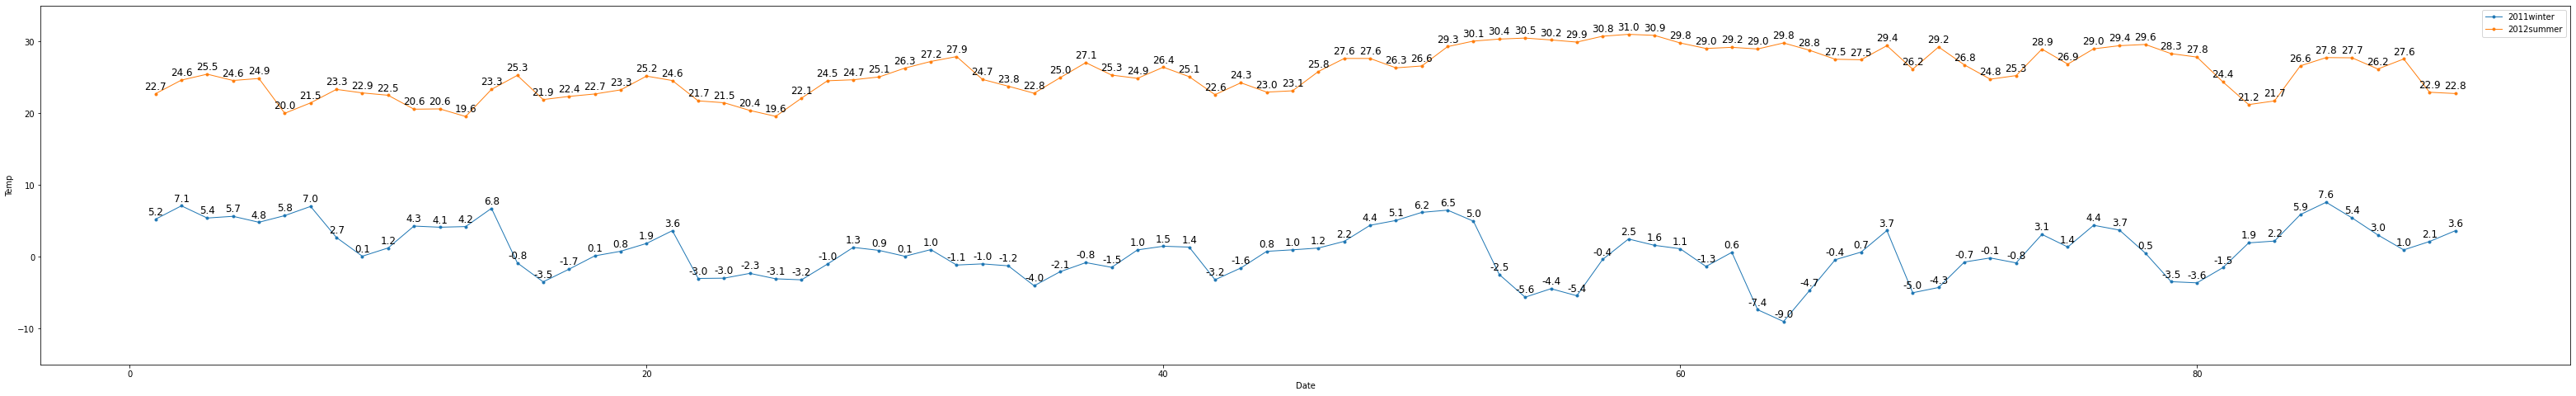

In [224]:
win_sum_graph(2011,2012)